# Biblioteki Pythona w analizie danych

## Tomasz Rodak

Wykład 7

---

Literatura:

- [PRML](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) Christopher M. Bishop, "Pattern Recognition and Machine Learning", 2006.
- [PML-1](https://probml.github.io/pml-book/) Kevin P. Murphy, "Probabilistic Machine Learning: An Introduction", 2022.
- C.M. Bishop, [Deep Learning, Foundations and Concepts](https://www.bishopbook.com/)
- [Dokumentacja NumPy](https://numpy.org/doc/stable/)
- [Dokumentacja scikit-learn](https://scikit-learn.org/stable/)
- [Dokumentacja PyTorch](https://pytorch.org/docs/stable/index.html)

# Sieci konwolucyjne

Sieci konwolucyjne (CNN) rozwiązują dwa główne problemy, które powstają, gdy przetwarzamy obrazy za pomocą klasycznych sieci neuronowych typu MLP:
1. wysoka liczba parametrów,
2. brak niezmienniczości ze względu na przesunięcia i obroty.

### Wysoka liczba parametrów

Pojedyncze wyjście w pierwszej warstwie ukrytej ma w MLP postać:

\begin{equation*}
z=f(\mathbf{w}^T\mathbf{x}+b),
\end{equation*}

gdzie $\mathbf{w}$ to wektor wag, $b$ to bias, a $f$ to funkcja aktywacji. Jeśli obraz ma rozmiar, powiedzmy $1000\times 1000$ pikseli w trzech kanałach, to liczba parametrów w tym wyjściu jest równa $3\cdot 1000\cdot 1000 + 1\approx 3\cdot 10^6$. Dla 1000 neuronów w warstwie ukrytej da to ogromną liczbę parametrów rzędu $3\cdot 10^9$. 

### Niezmienniczość ze względu na przesunięcia

Sieć MLP patrzy na obraz globalnie, co oznacza, że może nie być w stanie uchwycić lokalnych cech obrazu i traktować obrazy, które z naszego punktu widzenia są właściwie takie same, jako różne. Na przykład, jeśli obrazy zawierają w różnych położeniach czarną cyfrę "1" na białym tle, to sieć MLP może wymagać ogromnej liczby przykładów, aby nauczyć się, że w rzeczywistości obrazy te reprezentują tę samą klasę.  

## Filtry konwolucyjne

Rozważmy sieć neuronową, w której wejściem są obrazy reprezentowane przez piksele. Zakładamy na początek, że mamy jeden kanał i obraz jest w skali szarości. Na obrazie tym ustawiane jest w różnych położeniach prostokątne **okno** (*receptive field*), które zwykle ma postać kwadratu o rozmiarze $3\times 3$ lub $5\times 5$. Wewnątrz okna znajdują się (zwykle znormalizowane) piksele obrazu, które są przetwarzane przez **filtr konwolucyjny** za pomocą operacji **korelacji krzyżowej** (*cross-correlation*):

\begin{equation*}
z=\mathbf{w}^T\mathbf{x}+b,
\end{equation*}

gdzie $\mathbf{w}$ to wektor wag filtra, $b$ to bias, a $\mathbf{x}$ to wektor pikseli w oknie. Tablicę uzyskaną w wyniku zastosowania filtra $\mathbf{K}$ do wszystkich okien w obrazie $\mathbf{I}$ nazywamy **konwolucją** (*convolution*) i oznaczamy jako $\mathbf{I}\ast\mathbf{K}$. 

Zatem dla filtra o rozmiarze $h\times w$ mamy

\begin{equation*}
[\mathbf{I}\ast\mathbf{K}](i,j)=\sum_{m=0}^{h-1}\sum_{n=0}^{w-1} \mathbf{I}(i+m,j+n)\cdot \mathbf{K}(m,n),
\end{equation*}

gdzie $(i,j)$ to indeksy wartości w tablicy $\mathbf{I}\ast\mathbf{K}$.

Przykład: Dla $\mathbf{I}$ i $\mathbf{K}$ zdefiniowanych jako

\begin{equation*}
\mathbf{I}=\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}, \quad
\mathbf{K}=\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix}
\end{equation*}

mamy

\begin{equation*}
\mathbf{I}\ast\mathbf{K}=\begin{bmatrix}
1\cdot 1+2\cdot 2+4\cdot 3+5\cdot 4 & 2\cdot 1+3\cdot 2+5\cdot 3+6\cdot 4\\
4\cdot 1+5\cdot 2+7\cdot 3+8\cdot 4 & 5\cdot 1+6\cdot 2+8\cdot 3+9\cdot 4
\end{bmatrix}=\begin{bmatrix}
1+4+12+20 & 2+6+15+24\\
4+10+21+32 & 5+12+24+36
\end{bmatrix}=\begin{bmatrix}
37 & 47\\
66 & 77
\end{bmatrix}.
\end{equation*}

Na wyjściu z warstwy konwolucyjnej znajduje się funkcja aktywacji, najczęściej ReLU, która jest stosowana do każdego elementu tablicy $\mathbf{I}\ast\mathbf{K}$. W ten sposób pojedyncze wyjście (neuron) uzyskuje postać:

\begin{equation*}
z=\text{ReLU}(\mathbf{w}^T\mathbf{x}+b).
\end{equation*}

Neuron $z$ "widzi" tylko tę część obrazu, która znajduje się w oknie, ale wagi wszystkich neuronów w warstwie konwolucyjnej są współdzielone. Funkcja ReLU wygasza te korelacje krzyżowe, które są mniejsze od $-b$ i pozostawia bez zmiany te, które są większe. Ponieważ $\mathbf{w}^T\mathbf{x}$ jest zwykłym iloczynem skalarnym, więc będzie przyjmował największe wartości dla tych okien, w których piksele są podobne (bliskie współliniowości) do wag filtra. W ten sposób neuron $z$ "wykrywa" lokalne cechy obrazu, które są reprezentowane przez wagi filtra $\mathbf{w}$.

Wagi filtra $\mathbf{w}$ są trenowane w procesie uczenia, a ich liczba jest znacznie mniejsza niż liczba wag w MLP. Na przykład, dla filtra o rozmiarze $3\times 3$ mamy 9 wag i 1 bias. 

### Przykład

Filtry konwolucyjne do wykrywania krawędzi poziomych i pionowych:
\begin{equation*}
\mathbf{K}_{\text{h}}=\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{bmatrix}, \quad
\mathbf{K}_{\text{v}}=\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1
\end{bmatrix}.
\end{equation*}

Poniżej przykład zastosowania na obrazie w skali szarości.


In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
import torch.nn as nn


Pobieramy obrazek:

In [2]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Aptenodytes_forsteri_-Snow_Hill_Island%2C_Antarctica_-adults_and_juvenile-8.jpg/800px-Aptenodytes_forsteri_-Snow_Hill_Island%2C_Antarctica_-adults_and_juvenile-8.jpg"
r = requests.get(url)
r.raise_for_status()
with open("penguin.jpg", "wb") as f:
    f.write(r.content)

Wczytujemy za pomocą `PIL.Image` i nieco zmniejszamy:

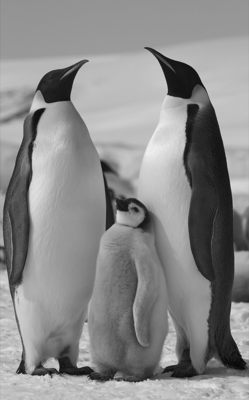

In [3]:
img = Image.open("penguin.jpg").convert("L")
img.thumbnail((img.height // 2, img.width // 2))
img


Przetwarzamy znromalizowany obraz przez każdy z filtrów.

In [4]:
from torch.nn import functional as F

# Convert the grayscale image to tensor format for PyTorch operations
arr = np.array(img) / 255.0  # Normalize pixel values to range [0,1]
img_tensor = torch.tensor(arr, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Define edge detection filters
# Vertical filter detects vertical edges (changes in horizontal direction)
vertical_filter = torch.tensor([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Horizontal filter detects horizontal edges (changes in vertical direction)
horizontal_filter = torch.tensor([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Apply convolution with ReLU activation to detect edges
img_vertical = F.relu(F.conv2d(img_tensor, vertical_filter, padding=1)).squeeze(0).squeeze(0).numpy()
img_horizontal = F.relu(F.conv2d(img_tensor, horizontal_filter, padding=1)).squeeze(0).squeeze(0).numpy()

# Function to normalize and convert to PIL Image
def normalize_to_image(arr):
    normalized = (arr - arr.min()) / (arr.max() - arr.min())
    return Image.fromarray((normalized * 255).astype(np.uint8))

# Process both filtered outputs
img_vertical = normalize_to_image(img_vertical)
img_horizontal = normalize_to_image(img_horizontal)

Wynik:

Text(0.5, 1.0, 'Horizontal Filter')

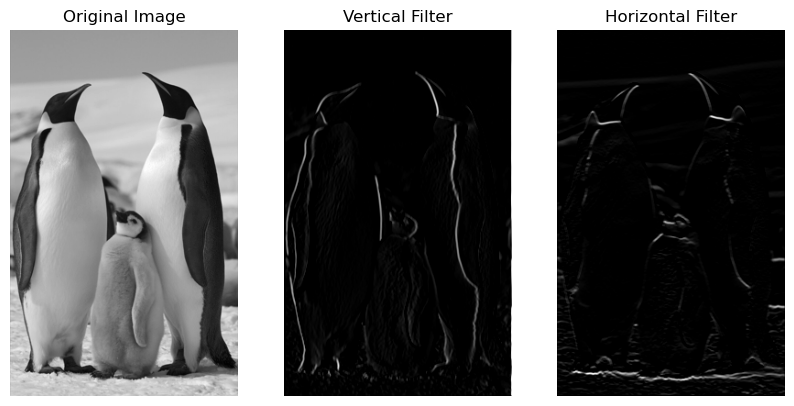

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Original Image")
axs[1].imshow(img_vertical, cmap="gray")
axs[1].axis("off")
axs[1].set_title("Vertical Filter")
axs[2].imshow(img_horizontal, cmap="gray")
axs[2].axis("off")
axs[2].set_title("Horizontal Filter")

## Padding

Konwolucja obrazu o wymiarach $H\times W$ z filtrem o wymiarach $h\times w$ zmniejsza rozmiar obrazu zgodnie ze wzorem:

\begin{equation*}
H_{\text{out}}=H_{\text{in}}-h+1, \quad W_{\text{out}}=W_{\text{in}}-w+1.
\end{equation*}

*Padding*, czyli dopełnianie, to technika, która polega na dodaniu pikseli dookoła obrazu, aby uzyskać większy rozmiar wyjściowy. Dodanie $p$ pikseli dookoła obrazu o wymiarach $H\times W$ daje obraz o wymiarach $(H+2p)\times(W+2p)$. W przypadku konwolucji z filtrem o wymiarach $h\times w$ dostajemy finalnie tablicę o wymiarach:

\begin{equation*}
H_{\text{out}}=H_{\text{in}}+2p-h+1, \quad W_{\text{out}}=W_{\text{in}}+2p-w+1.
\end{equation*}

Dodatkowe piksele wypełnia się zwykle zerami, o ile wcześniej od obrazu odjęto średnią, dzięki czemu 0 jest wartością średnią pikseli. 


## Stride

*Stride* to krok, o jaki przesuwamy okno filtra po obrazie. Domyślnie jest równy 1, co oznacza, że filtr przesuwa się o jeden piksel w prawo lub w dół. Im większy krok, tym mniejszy rozmiar wyjściowy. Dla kroku $s$ i paddingu $p$ mamy:

\begin{equation*}
H_{\text{out}}=\left\lfloor\frac{H_{\text{in}}+2p-h}{s}\right\rfloor-1, \quad W_{\text{out}}=\left\lfloor\frac{W_{\text{in}}+2p-w}{s}\right\rfloor-1.
\end{equation*}

## Konwolucje z wieloma filtrami

Dla obrazu o $C$ kanałach filtr konwolucyjny ma wymiary $h\times w\times C$ i posiada $hwC$ wag plus bias. Aby sieć mogła wykrywać różnorodne cechy lokalne, filtry w warstwie organizuje się w tensor o wymiarach $h\times w\times C\times C_{\text{out}}$, gdzie $C_{\text{out}}$ to liczba filtrów w danej warstwie.

Łączna liczba parametrów w warstwie konwolucyjnej wynosi $(hwC+1)\cdot C_{\text{out}}$. **Kluczowa zaleta**: liczba parametrów nie zależy od rozmiaru obrazu ($H$ i $W$) - parametrów jest znacznie mniej niż w analogicznym zadaniu wymagałaby sieć MLP.

## Pooling

Pooling to operacja nie podobna konwolucji, która zmniejsza rozmiar obrazu. I w tym przypadku stosuje się prostokątne okno (*receptive field*), które przesuwa się po obrazie, nie ma jednak żadnych parametrów do wytrenowania. Efektem poolingu na pojedynczym oknie jest wynik działania prostej funkcji agregującej na pikselach tego okna, np. maksimum lub średniej. Krok przesuwania okna jest zwykle taki sam jak rozmiar okna, co oznacza, że nie nakładają się one na siebie. Pooling stosowany jest do każdego kanału z osobna, zmniejsza więc rozmiar obrazu, ale nie zmienia liczby kanałów.

## Equiwariantność i niezmienniczość

Sieci konwolucyjne są equiwariantne względem przesunięcia (**translation equivariant**), co oznacza, że przesunięcie cech w obrazie skutkuje odpowiednim przesunięciem cech w wyjściu. Equiwariantność jest zapewniana przez współdzielenie wag w warstwie konwolucyjnej - cecha zostanie wykryta niezależnie od tego, gdzie się znajduje w obrazie, i zostanie uwidoczniona w odpowiednim miejscu w mapie aktywacji.

Pooling powoduje, że lokalne niewielkie przesunięcia cech w obrazie nie mają wpływu na wyjście, ponieważ operacja ta wybiera dominujące wartości z małych regionów obrazu. W ten sposób sieci konwolucyjne stają się niezmiennicze (**translation invariant**) względem niewielkich przesunięć cech w obrazie.

## Architektura sieci konwolucyjnej

Typowa architektura prostej sieci konwolucyjnej składa się z następujących po sobie warstw:
1. konwolucyjna,
2. aktywacji (np. ReLU),
3. pooling (np. max pooling).

Sieć kończy się zwykle warstwą wypłaszczającą (*flatten*), która przekształca mapy aktywacji w wektory, po której następuje w pełni połączona sieć neuronowa (MLP), która przetwarza aktywacje z ostatniej warstwy konwolucyjnej. 

## [LeNet-5](http://en.wikipedia.org/wiki/LeNet-5)

Jedna z pierwszych sieci konwolucyjnych, zaprojektowana przez Yann LeCun i jego współpracowników w 1998 roku. Została zaprojektowana do rozpoznawania cyfr w obrazach o rozmiarze $28\times 28$ pikseli. 

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

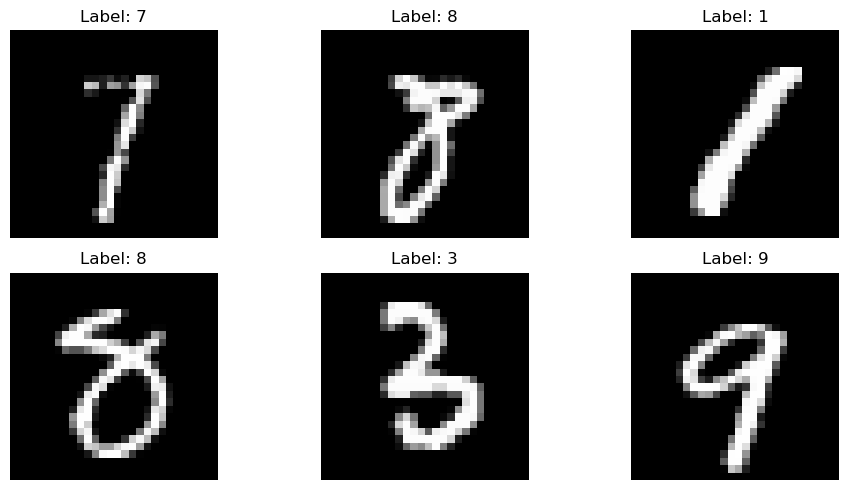

In [8]:
idx = np.random.randint(0, len(training_data), 6)
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(training_data[idx[i]][0][0], cmap="gray")
    ax.axis("off")
    ax.set_title(f"Label: {training_data[idx[i]][1]}")
plt.tight_layout()

In [9]:
class LeNetMNIST(nn.Module):
    def __init__(self):
        super(LeNetMNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.activation = nn.Tanh()  
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.activation(self.conv1(x)) # --> 6x28x28
        x = self.pool(x) # --> 6x14x14
        x = self.activation(self.conv2(x)) # --> 16x10x10
        x = self.pool(x) # --> 16x5x5
        x = x.view(-1, 16 * 5 * 5) # Flatten the tensor
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNetMNIST().to(device)
loss_fn = nn.CrossEntropyLoss()

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
n_epochs = 5
model.train()

for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            print(f"Batch {batch}, Loss: {loss.item():.4f}")
    print("Training complete.")

In [13]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        _, predicted = torch.max(pred, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9586


In [14]:
def show_bad_predictions(model, test_data, n=6):
    model.eval()
    bad_predictions = []
    with torch.no_grad():
        for i in range(len(test_data)):
            X, y = test_data[i]
            X = X.unsqueeze(0).to(device)
            pred = model(X)
            _, predicted = torch.max(pred, 1)
            if predicted.item() != y:
                bad_predictions.append((X.squeeze().cpu(), predicted.item(), y))
                if len(bad_predictions) >= n:
                    break
    return bad_predictions
bad_preds = show_bad_predictions(model, test_data, n=6)

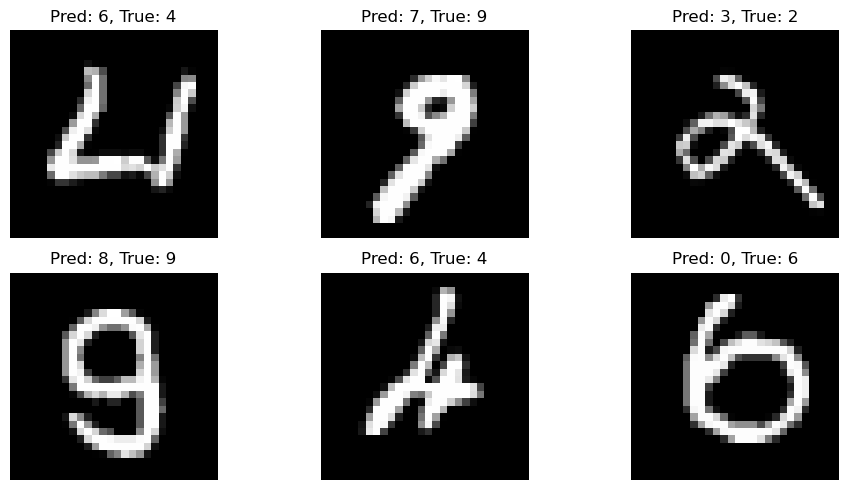

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(bad_preds[i][0].cpu(), cmap="gray")
    ax.axis("off")
    ax.set_title(f"Pred: {bad_preds[i][1]}, True: {bad_preds[i][2]}")
plt.tight_layout()